In [1]:
import pandas as pd

In [51]:
c = pd.read_csv('contracts2015.csv', sep='\t')
c.describe()

,Año,Número Contrato,Artículo,Número Derivado,Presupuesto Total,Id
count,1954,1.954000e+03,19,1954.000000,1954.000000,1954.000000
mean,2015,2.014023e+08,170,75.291198,59978.599284,976.500000
std,0,1.163123e+05,0,97.504677,1284170.577840,564.215532
min,2015,2.012001e+08,170,1.000000,23.000000,0.000000
25%,2015,2.013006e+08,170,16.000000,1858.000000,488.250000
50%,2015,2.015000e+08,170,39.000000,10454.500000,976.500000
75%,2015,2.015003e+08,170,96.750000,29056.250000,1464.750000
max,2015,2.015009e+08,170,450.000000,56659177.000000,1953.000000


In [52]:
c.head(1)

,Mes,Año,Descripción Centro,Organismo,Número Contrato,Número Expediente,Descripcion,Tipo Contrato,Procedimiento Adjudicación,Artículo,...,Fecha Adjudicación,Fecha Formalización,Número Derivado,Objeto Derivado,Presupuesto Total,Importe Adjudicación,Plazo Derivado,Fecha Aprobación Derivado,Fecha Formalización Derivado,Id
0,Enero,2015,AYUNTAMIENTO DE MADRID,ÁREA DE GOBIERNO DE URBANISMO Y VIVIENDA,201200087,711/2011/18578,ACUERDO MARCO PARA LAS INTERVENCIONES EN EJECU...,Obras,Abierto,NaN,...,23/12/2011,13/01/2012,60,"711/2014/10914AVDA. BADAJOZ, 74.- CEIP MÉJICO",108798,"108.798,07 €","4,16",15/12/2014,16/12/2014,0


In [53]:
c_avg_month = c[['Mes', 'Presupuesto Total']].groupby('Mes', as_index=False).mean()
c_avg_month.head()

,Mes,Presupuesto Total
0,Abril,15990.491803
1,Agosto,26970.113333
2,Diciembre,51390.747170
3,Enero,815039.619718
4,Febrero,20648.666667


In [54]:
c_total_month = c[['Mes', 'Presupuesto Total']].groupby('Mes', as_index=False).sum()
c_total_month.head()

,Mes,Presupuesto Total
0,Abril,2926260
1,Agosto,4045517
2,Diciembre,13618548
3,Enero,57867813
4,Febrero,433622


In [55]:
c_max_month = c[['Mes', 'Presupuesto Total']].groupby('Mes', as_index=False).max()
c_max_month.head()

,Mes,Presupuesto Total
0,Abril,349767
1,Agosto,199836
2,Diciembre,1311586
3,Enero,56659177
4,Febrero,204303


In [56]:
c_max_month = pd.merge(c_max_month, c, on='Presupuesto Total')


In [57]:
c_all = pd.DataFrame({'Month': c_avg_month['Mes']})
c_all['Mean'] = c_avg_month['Presupuesto Total']
c_all['Total'] = c_total_month['Presupuesto Total']
c_all['Biggest'] = c_max_month['Presupuesto Total']
c_all['B_company'] = c_max_month['Empresa']
c_all['B_description'] = c_max_month['Descripcion']

In [58]:
c_all

,Month,Mean,Total,Biggest,B_company,B_description
0,Abril,15990.491803,2926260,349767,FCC CONSTRUCCION; S.A.,ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DE ...
1,Agosto,26970.113333,4045517,199836,"EULEN, S.A.","ACUERDO MARCO DE OBRAS DE REFORMA, REPARACIÓN..."
2,Diciembre,51390.747170,13618548,1311586,FCC CONSTRUCCION; S.A.,ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DE ...
3,Enero,815039.619718,57867813,56659177,"ENDESA ENERGÍA, S.A.U.",ACUERDO MARCO PARA EL SUMINISTRO DE ENERGÍA EL...
4,Febrero,20648.666667,433622,204303,FCC CONSTRUCCION; S.A.,ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DER...
5,Julio,33742.480620,8705560,447542,FCC CONSTRUCCION; S.A.,ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DE ...
6,Junio,45710.773006,7450856,2697121,FCC CONSTRUCCION; S.A.,ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DE ...
7,Marzo,10488.898734,828623,213744,"COARSA, S.A.",ACUERDO MARCO PARA LAS INTERVENCIONES EN EJECU...
8,Mayo,12189.714286,1706560,234659,"ORTIZ CONSTRUCCIONES Y PROYECTOS, S.A.",ACUERDO MARCO PARA LA REALIZACIÓN DE OBRAS DER...
9,Noviembre,29526.066667,4428910,460900,ILUMINACIONES XIMENEZ S.A.,ACUERDO MARCO DE SERVICIOS PARA LA INSTALACIÓN...


Populating the interactive namespace from numpy and matplotlib


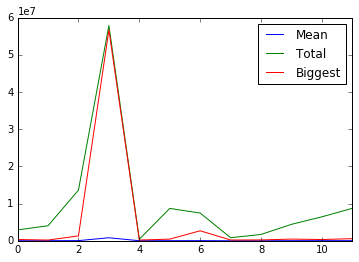

In [59]:
%pylab inline
c_all.plot()

In [60]:
c_all.to_csv('out.csv', sep=';', encoding='utf-8')